## Autoencoders

In [1]:
cd ../../src

/home/kuba/Projects/notebooks/examples-counterexamples/src


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import theano
import theano.tensor as T

from fetch_mnist import preprocessed_mnist
from neural_nets.autoencoder import Autoencoder 

In [3]:
X_train, X_test, y_train, y_test = preprocessed_mnist(random_state=0)

/opt/anaconda3/envs/nnets/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [52]:
def train_and_present_autoencoder(**kwargs):
  autoencoder = Autoencoder(
    initialization_type='xavier',
    optimization_params={
      'method': 'nesterov',
      'decay': 0.9},
  **kwargs)


  %time autoencoder.fit(X_train)

  plt.plot(autoencoder.losses)
  plt.show()

  X_test_retrieved = autoencoder.retrieve(X_test)
  for i in range(10):
    img = X_test[i, :].reshape(28, 28)
    retrieved_img = X_test_retrieved[i, :].reshape(28, 28)

    plt.imshow(img, cmap='gray')
    plt.show()
    plt.imshow(retrieved_img, cmap='gray')
    plt.show()

CPU times: user 5min 52s, sys: 13.1 s, total: 6min 5s
Wall time: 3min 3s


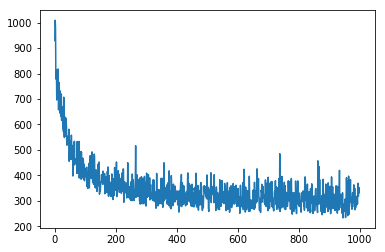

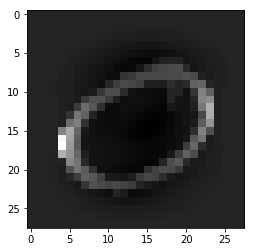

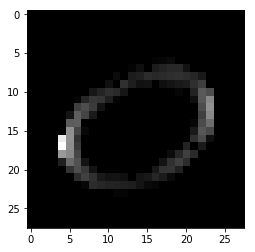

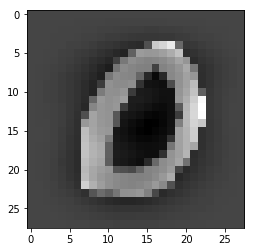

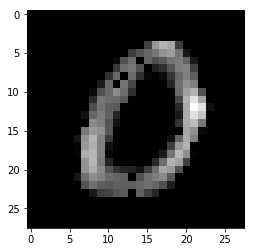

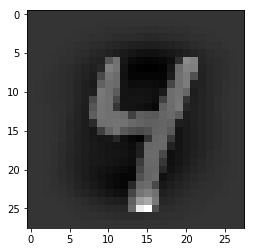

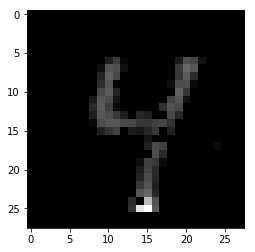

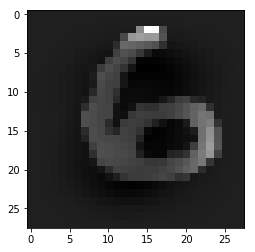

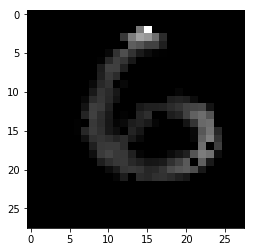

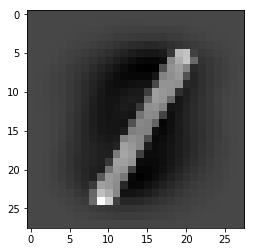

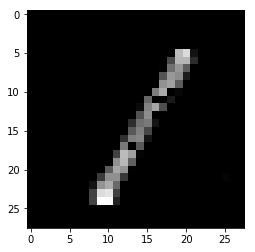

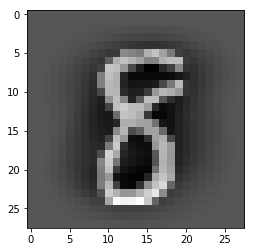

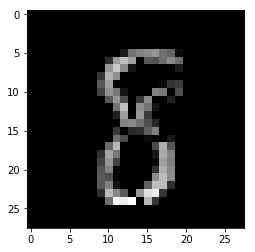

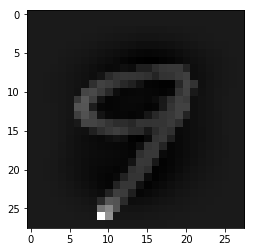

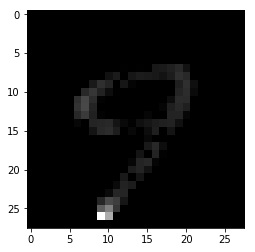

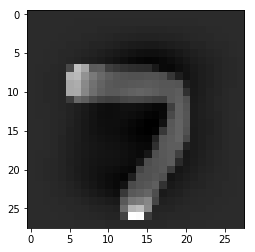

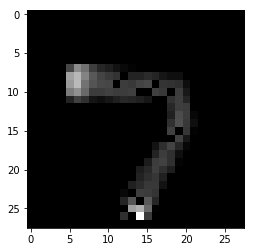

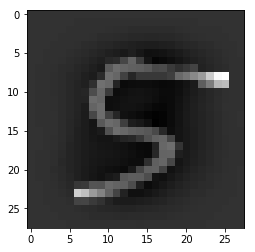

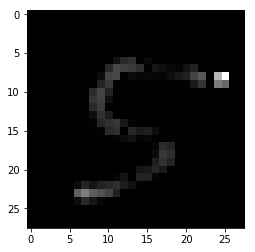

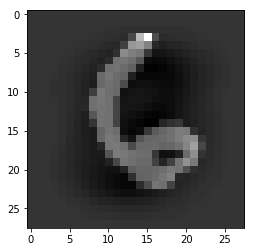

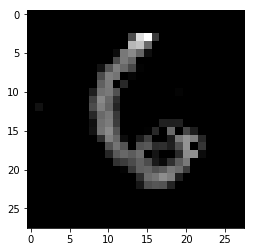

In [55]:
shared_args = (dict(
  n_iter=1000,
  hidden_sizes = [250],
  batch_size = 2500,
  lmbda=0.005,
  learning_rate=0.001))

args_dict = (dict(
  lmbda=0.001,
  l1_ratio=0.25))

args_dict.update(shared_args)

train_and_present_autoencoder(**args_dict)

CPU times: user 5min 19s, sys: 2.08 s, total: 5min 21s
Wall time: 2min 41s


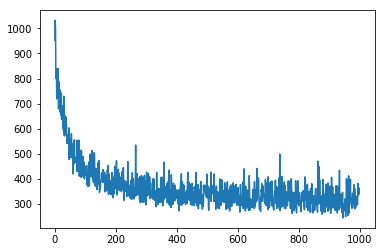

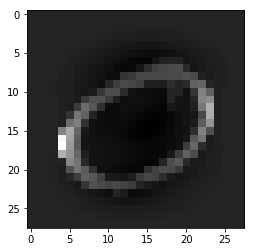

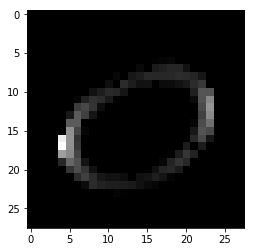

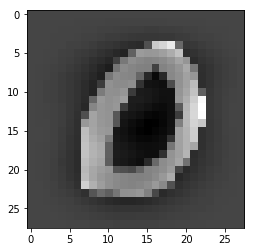

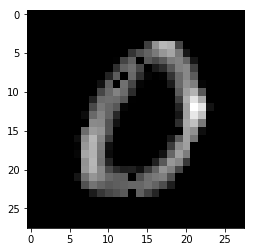

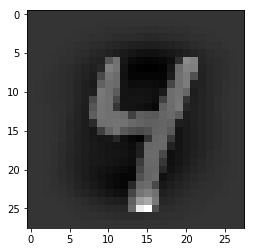

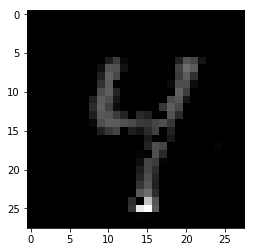

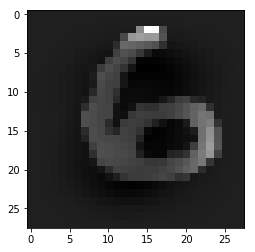

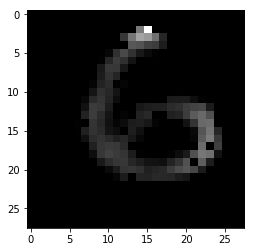

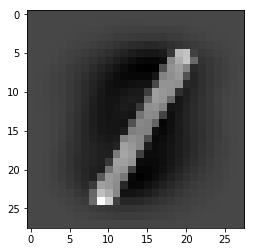

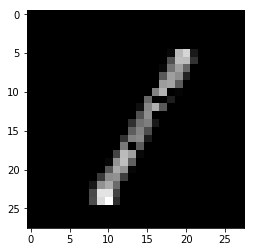

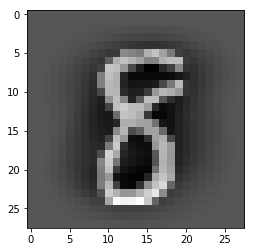

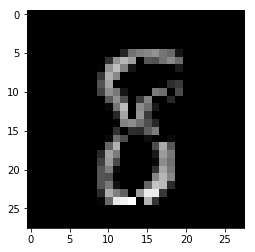

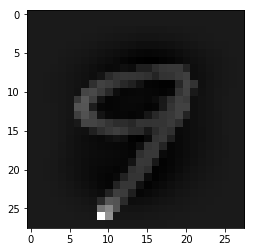

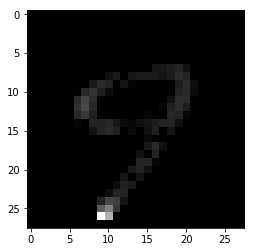

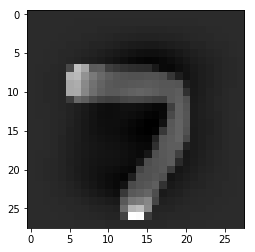

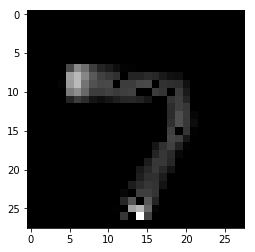

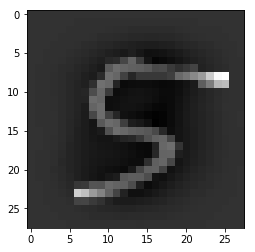

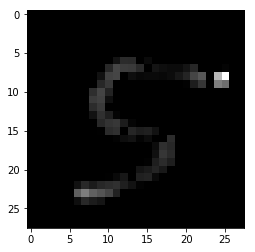

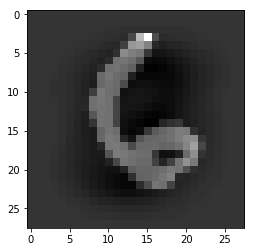

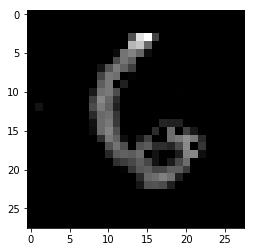

In [56]:
args_dict = (dict(
  lmbda=0.005,
  l1_ratio=0.5))

args_dict.update(shared_args)

train_and_present_autoencoder(**args_dict)